In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams.update({
    "font.size": 14,
    "font.family": "serif", 
    "mathtext.fontset": "cm"})

## Line Plots

In [53]:
current = np.arange(0,5)

In [54]:
current

array([0, 1, 2, 3, 4])

In [55]:
voltage = 2 * current

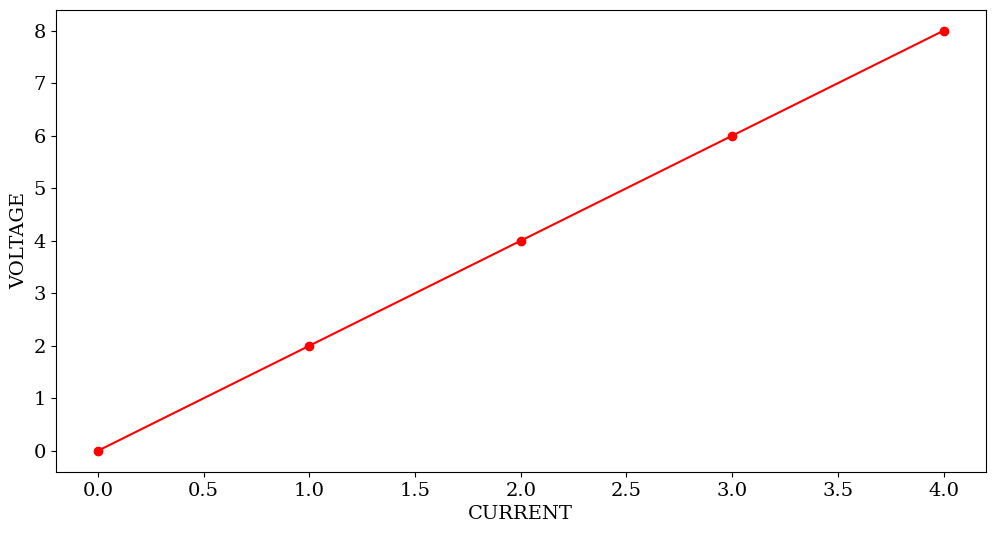

In [102]:
plt.figure(figsize=(12,6))
# plt.plot(current, voltage, linestyle='None', marker='x');
plt.plot(current, voltage, linestyle='-', marker='o', color='red')
plt.xlabel('CURRENT')
plt.ylabel('VOLTAGE')
plt.show()

Text(0, 0.5, 'VOLTAGE')

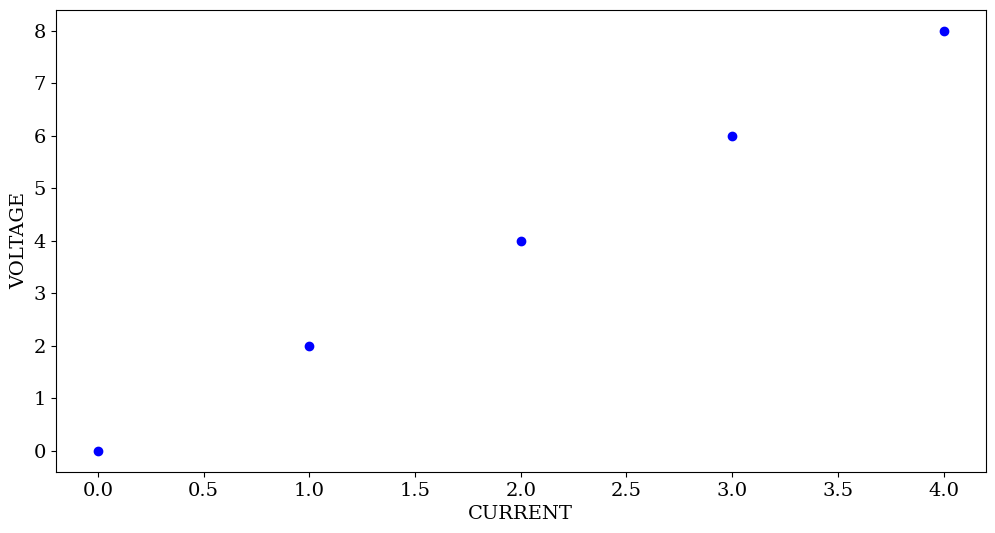

In [56]:
plt.figure(figsize=(12,6))
plt.plot(current, voltage, marker='o', linestyle='None', markerfacecolor='blue', markeredgecolor='blue')
# plt.plot(current, voltage, marker='o', markerfacecolor='red', linewidth=2))
plt.xlabel(r'CURRENT')
plt.ylabel(r'VOLTAGE')

In [107]:
# np.arange(0,5)
# np.linspace(0,4,5)

In [57]:
current_model = np.linspace(0,10)
voltage_model = 2 * current_model

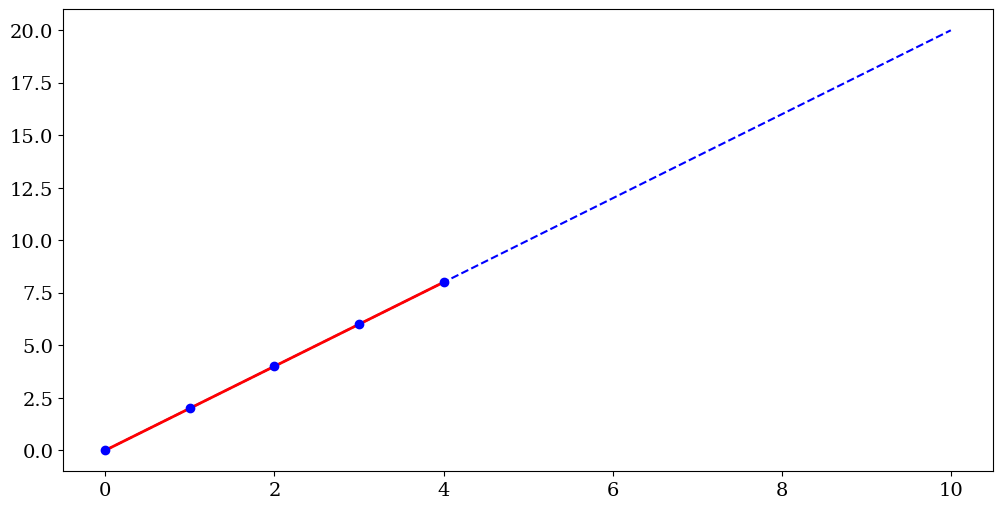

In [108]:
plt.figure(figsize=(12,6))
plt.plot(current_model, voltage_model, linestyle='--', color='blue', label=r'EXTRAPOLATION')
plt.plot(current, voltage, color='red', linewidth=2, label=r'INTERPOLATION')
plt.plot(current, voltage, marker='o', linestyle='None', markerfacecolor='blue', markeredgecolor='blue', label=r'MEASUREMENTS')

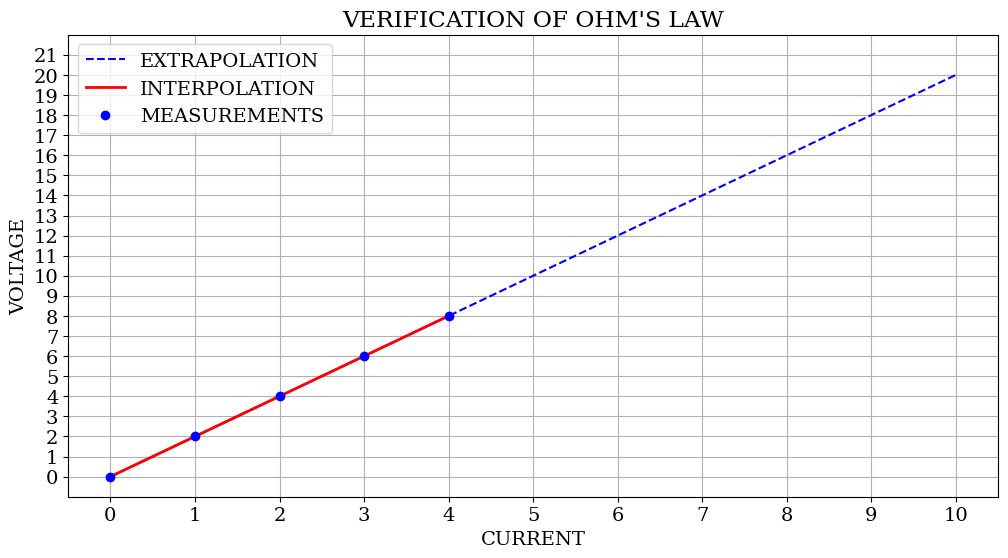

In [119]:
plt.figure(figsize=(12,6))
plt.plot(current_model, voltage_model, linestyle='--', color='blue', label=r'EXTRAPOLATION')
plt.plot(current, voltage, color='red', linewidth=2, label=r'INTERPOLATION')
plt.plot(current, voltage, marker='o', linestyle='None', markerfacecolor='blue', markeredgecolor='blue', label=r'MEASUREMENTS')

plt.title(r"VERIFICATION OF OHM'S LAW")
plt.xlabel(r'CURRENT')
plt.ylabel(r'VOLTAGE')

plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,22))

plt.grid()
plt.legend()

plt.xlim([-0.5,10.5])
plt.ylim([-1,22])

plt.savefig('ohm.pdf', format='pdf', bbox_inches='tight')

## Sample Data

In [59]:
data = pd.read_csv('../data/sample_data.csv')

In [60]:
data.head()

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   column_a  5 non-null      int64
 1   column_b  5 non-null      int64
 2   column_c  5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [121]:
data.column_a

0    1
1    2
2    3
3    4
4    5
Name: column_a, dtype: int64

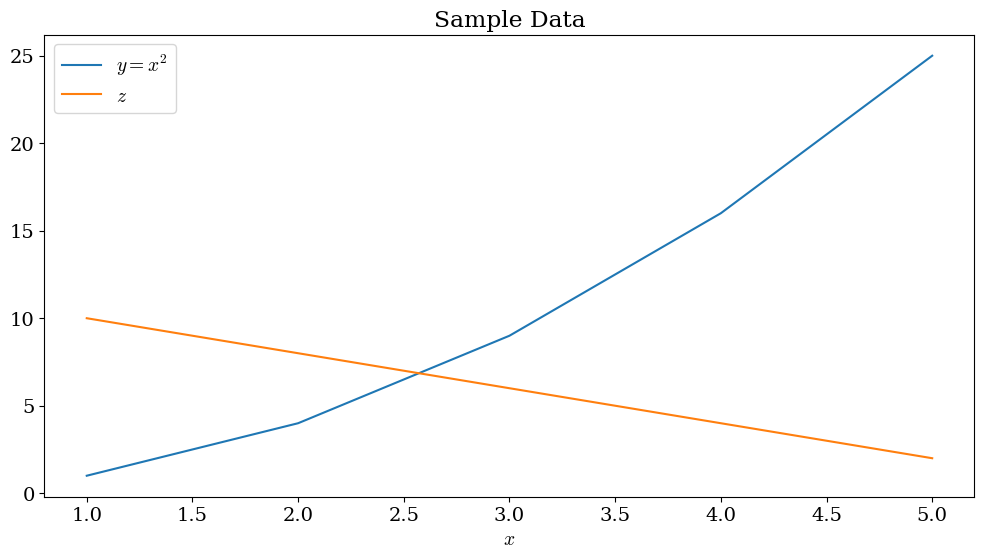

In [122]:
plt.figure(figsize=(12,6))
plt.plot(data.column_a, data.column_b, label=r'$y = x^2$')
plt.plot(data.column_a, data.column_c, label=r'$z$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show();

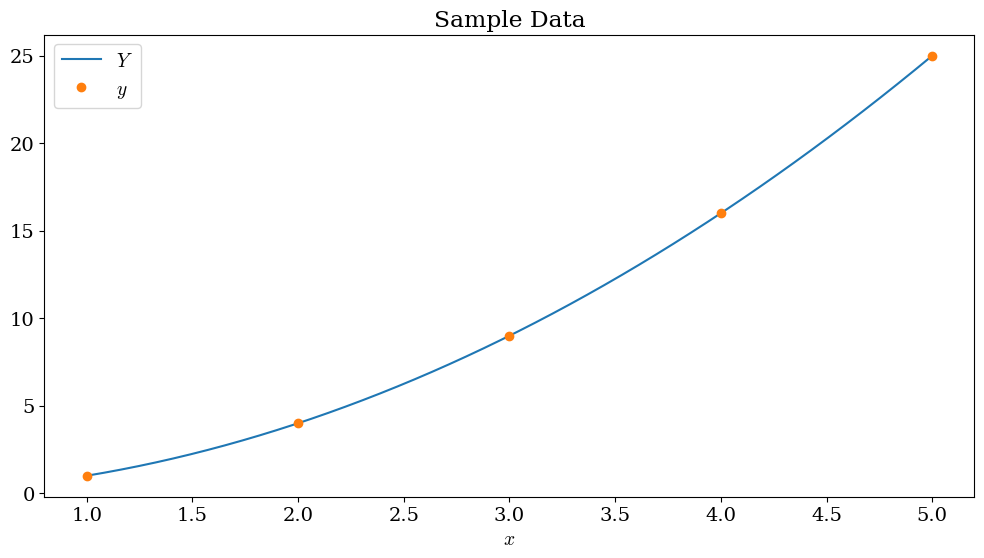

In [63]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(1,5), np.linspace(1,5)**2, label=r'$Y$')
plt.plot(data.column_a, data.column_b, 'o', label=r'$y$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show()

## Population Data

In [64]:
population = pd.read_csv('../data/countries.csv')
population.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [65]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [126]:
population.country == 'afghanistan'

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [66]:
indian = population[population.country == 'India']
chinese = population[population.country == 'China']

In [123]:
indian

,country,year,population
696,India,1952,372000000
697,India,1957,409000000
698,India,1962,454000000
699,India,1967,506000000
700,India,1972,567000000
701,India,1977,634000000
702,India,1982,708000000
703,India,1987,788000000
704,India,1992,872000000
705,India,1997,959000000


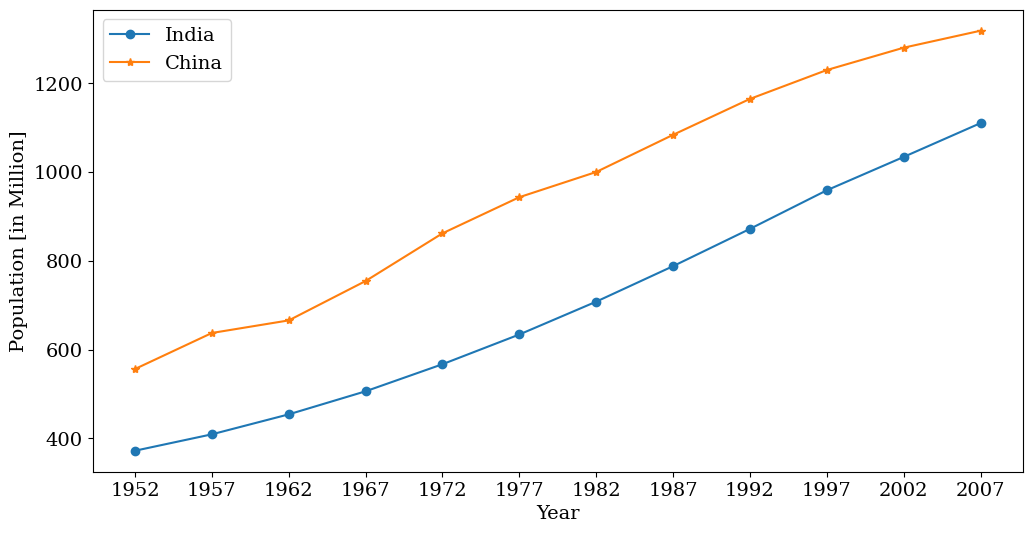

In [67]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / 10**6, '-o', label=r'India')
plt.plot(chinese.year, chinese.population / 10**6, '-*', label=r'China')
plt.legend()

plt.ylabel(r'Population [in Million]')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

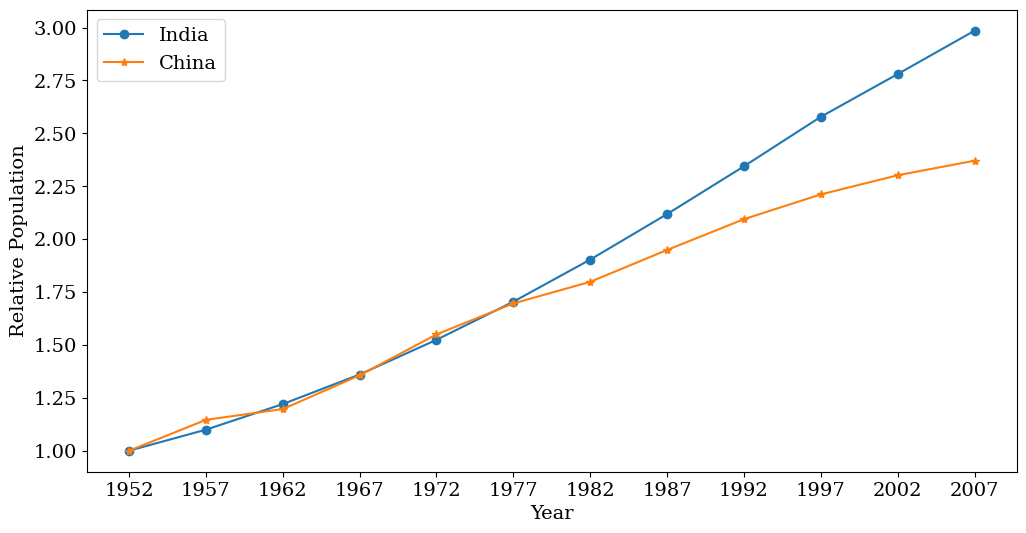

In [68]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / indian.population.iloc[0], '-o', label=r'India')
plt.plot(chinese.year, chinese.population / chinese.population.iloc[0], '-*', label=r'China')
plt.legend()

plt.ylabel(r'Relative Population')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

**Checkpoint:** Can you make any inferences from this plot?